# dqn PacMan

In [40]:
import gym
import numpy as np 

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt

from rl.agents.dqn import DQNAgent
from rl.agents.ddpg import DDPGAgent
from rl.policy import BoltzmannGumbelQPolicy 
from rl.memory import SequentialMemory

In [31]:
env = gym.make('MsPacman-v0')
nb_actions = env.action_space.n
nb_actions

9

In [32]:
# Next, we build a neural network model
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(3, activation= 'tanh')) # layer 1: 3 cells with tanh activation function 
model.add(Dense(nb_actions))
model.add(Dense(6, activation= 'sigmoid')) #layer 2 : 6 cells with sigmoid activation function 
model.add(Dense(nb_actions))
model.add(Dense(6, activation= 'sigmoid')) #layer 3 : 6 cells with sigmoid activation function  
model.add(Dense(nb_actions))
model.add(Dense(6, activation= 'sigmoid')) #layer 4 : 6 cells with sigmoid activation function  
model.add(Dense(nb_actions))
model.add(Dense(3, activation= 'tanh')) #layer 5 : 3 cells with tanh activation function  
model.add(Dense(nb_actions))
model.add(Dense(3, activation= 'sigmoid')) #layer 6 : 6 cells with sigmoid activation function  
model.add(Dense(nb_actions))
model.add(Activation('softmax')) # one layer of 1 unit with sigmoid activation function
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 100800)            0         
_________________________________________________________________
dense_43 (Dense)             (None, 3)                 302403    
_________________________________________________________________
dense_44 (Dense)             (None, 9)                 36        
_________________________________________________________________
dense_45 (Dense)             (None, 6)                 60        
_________________________________________________________________
dense_46 (Dense)             (None, 9)                 63        
_________________________________________________________________
dense_47 (Dense)             (None, 6)                 60        
_________________________________________________________________
dense_48 (Dense)             (None, 9)                 63        
__________

In [33]:
#DQN -- Deep Reinforcement Learning 

#Configure and compile the agent. 
#Use every built-in Keras optimizer and metrics!
memory = SequentialMemory(limit=100000, window_length=1)
policy = BoltzmannGumbelQPolicy()
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=50,
              target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae', 'acc'])

In [22]:
## Visualize the training during 5000000 steps 
## Each episode is a game in wich Pacman has two lifes 
### When nb_steps is not long enough , a warning might appear 
### "Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!"

dqn.fit(env, nb_steps=100000, visualize=True, verbose=2)


Training for 100000 steps ...
   922/100000: episode: 1, duration: 29.546s, episode steps: 922, steps per second: 31, episode reward: 370.000, mean reward: 0.401 [0.000, 10.000], mean action: 3.359 [0.000, 8.000], mean observation: 72.595 [0.000, 228.000], loss: 2.750501, mean_absolute_error: 0.159018, acc: 0.409802, mean_q: 0.655422
  1355/100000: episode: 2, duration: 12.858s, episode steps: 433, steps per second: 34, episode reward: 60.000, mean reward: 0.139 [0.000, 10.000], mean action: 3.009 [1.000, 6.000], mean observation: 72.910 [0.000, 228.000], loss: 1.932692, mean_absolute_error: 0.100334, acc: 0.736865, mean_q: 0.939665
  1794/100000: episode: 3, duration: 12.995s, episode steps: 439, steps per second: 34, episode reward: 60.000, mean reward: 0.137 [0.000, 10.000], mean action: 3.030 [0.000, 7.000], mean observation: 72.906 [0.000, 228.000], loss: 1.599364, mean_absolute_error: 0.077912, acc: 0.806948, mean_q: 0.964618
  2230/100000: episode: 4, duration: 13.087s, episode 

 14350/100000: episode: 28, duration: 12.788s, episode steps: 431, steps per second: 34, episode reward: 60.000, mean reward: 0.139 [0.000, 10.000], mean action: 3.009 [3.000, 7.000], mean observation: 72.912 [0.000, 228.000], loss: 0.837868, mean_absolute_error: 0.025444, acc: 0.970780, mean_q: 0.999970
 14775/100000: episode: 29, duration: 12.599s, episode steps: 425, steps per second: 34, episode reward: 60.000, mean reward: 0.141 [0.000, 10.000], mean action: 3.012 [3.000, 6.000], mean observation: 72.913 [0.000, 228.000], loss: 0.885915, mean_absolute_error: 0.027345, acc: 0.966765, mean_q: 0.999976
 15202/100000: episode: 30, duration: 12.630s, episode steps: 427, steps per second: 34, episode reward: 60.000, mean reward: 0.141 [0.000, 10.000], mean action: 3.000 [0.000, 7.000], mean observation: 72.907 [0.000, 228.000], loss: 1.067898, mean_absolute_error: 0.027376, acc: 0.970653, mean_q: 0.999980
 15628/100000: episode: 31, duration: 12.637s, episode steps: 426, steps per secon

 26222/100000: episode: 55, duration: 12.969s, episode steps: 438, steps per second: 34, episode reward: 60.000, mean reward: 0.137 [0.000, 10.000], mean action: 2.993 [0.000, 3.000], mean observation: 72.908 [0.000, 228.000], loss: 0.877860, mean_absolute_error: 0.020972, acc: 0.981949, mean_q: 1.000000
 26654/100000: episode: 56, duration: 12.859s, episode steps: 432, steps per second: 34, episode reward: 60.000, mean reward: 0.139 [0.000, 10.000], mean action: 3.012 [3.000, 8.000], mean observation: 72.914 [0.000, 228.000], loss: 0.893530, mean_absolute_error: 0.025140, acc: 0.978516, mean_q: 1.000000
 27184/100000: episode: 57, duration: 15.685s, episode steps: 530, steps per second: 34, episode reward: 110.000, mean reward: 0.208 [0.000, 10.000], mean action: 3.002 [3.000, 4.000], mean observation: 72.849 [0.000, 228.000], loss: 0.871484, mean_absolute_error: 0.024115, acc: 0.980837, mean_q: 1.000000
 27647/100000: episode: 58, duration: 13.676s, episode steps: 463, steps per seco

 38046/100000: episode: 82, duration: 12.966s, episode steps: 434, steps per second: 33, episode reward: 60.000, mean reward: 0.138 [0.000, 10.000], mean action: 2.993 [0.000, 3.000], mean observation: 72.915 [0.000, 228.000], loss: 0.746647, mean_absolute_error: 0.020482, acc: 0.985383, mean_q: 1.000000
 38482/100000: episode: 83, duration: 12.969s, episode steps: 436, steps per second: 34, episode reward: 60.000, mean reward: 0.138 [0.000, 10.000], mean action: 3.007 [2.000, 7.000], mean observation: 72.911 [0.000, 228.000], loss: 0.842648, mean_absolute_error: 0.022776, acc: 0.984088, mean_q: 1.000000
 38998/100000: episode: 84, duration: 15.467s, episode steps: 516, steps per second: 33, episode reward: 110.000, mean reward: 0.213 [0.000, 10.000], mean action: 3.010 [0.000, 8.000], mean observation: 72.853 [0.000, 228.000], loss: 0.791431, mean_absolute_error: 0.021996, acc: 0.982316, mean_q: 1.000000
 39430/100000: episode: 85, duration: 12.932s, episode steps: 432, steps per seco

 50042/100000: episode: 109, duration: 13.319s, episode steps: 428, steps per second: 32, episode reward: 60.000, mean reward: 0.140 [0.000, 10.000], mean action: 2.998 [2.000, 3.000], mean observation: 72.914 [0.000, 228.000], loss: 0.796233, mean_absolute_error: 0.021130, acc: 0.987077, mean_q: 1.000000
 50472/100000: episode: 110, duration: 13.205s, episode steps: 430, steps per second: 33, episode reward: 60.000, mean reward: 0.140 [0.000, 10.000], mean action: 3.012 [3.000, 6.000], mean observation: 72.909 [0.000, 228.000], loss: 0.958833, mean_absolute_error: 0.023197, acc: 0.987064, mean_q: 1.000000
 51182/100000: episode: 111, duration: 21.496s, episode steps: 710, steps per second: 33, episode reward: 780.000, mean reward: 1.099 [0.000, 400.000], mean action: 3.023 [3.000, 8.000], mean observation: 72.878 [0.000, 228.000], loss: 1.750635, mean_absolute_error: 0.022866, acc: 0.987192, mean_q: 1.000000
 51616/100000: episode: 112, duration: 12.981s, episode steps: 434, steps per

 62241/100000: episode: 136, duration: 12.967s, episode steps: 434, steps per second: 33, episode reward: 60.000, mean reward: 0.138 [0.000, 10.000], mean action: 3.000 [3.000, 3.000], mean observation: 72.908 [0.000, 228.000], loss: 0.739101, mean_absolute_error: 0.019514, acc: 0.989127, mean_q: 1.000000
 62688/100000: episode: 137, duration: 13.364s, episode steps: 447, steps per second: 33, episode reward: 60.000, mean reward: 0.134 [0.000, 10.000], mean action: 3.000 [3.000, 3.000], mean observation: 72.911 [0.000, 228.000], loss: 0.831790, mean_absolute_error: 0.021591, acc: 0.988465, mean_q: 1.000000
 63121/100000: episode: 138, duration: 13.000s, episode steps: 433, steps per second: 33, episode reward: 60.000, mean reward: 0.139 [0.000, 10.000], mean action: 3.000 [3.000, 3.000], mean observation: 72.914 [0.000, 228.000], loss: 7.999557, mean_absolute_error: 0.025455, acc: 0.988380, mean_q: 1.000000
 63546/100000: episode: 139, duration: 13.515s, episode steps: 425, steps per s

 74051/100000: episode: 163, duration: 13.276s, episode steps: 436, steps per second: 33, episode reward: 60.000, mean reward: 0.138 [0.000, 10.000], mean action: 3.000 [3.000, 3.000], mean observation: 72.911 [0.000, 228.000], loss: 6.441117, mean_absolute_error: 0.021877, acc: 0.989822, mean_q: 1.000000
 74488/100000: episode: 164, duration: 13.053s, episode steps: 437, steps per second: 33, episode reward: 60.000, mean reward: 0.137 [0.000, 10.000], mean action: 3.000 [3.000, 3.000], mean observation: 72.909 [0.000, 228.000], loss: 0.819825, mean_absolute_error: 0.021008, acc: 0.990346, mean_q: 1.000000
 74921/100000: episode: 165, duration: 13.294s, episode steps: 433, steps per second: 33, episode reward: 60.000, mean reward: 0.139 [0.000, 10.000], mean action: 2.998 [0.000, 5.000], mean observation: 72.913 [0.000, 228.000], loss: 0.865574, mean_absolute_error: 0.022025, acc: 0.990257, mean_q: 1.000000
 75354/100000: episode: 166, duration: 13.565s, episode steps: 433, steps per s

 85917/100000: episode: 190, duration: 13.049s, episode steps: 429, steps per second: 33, episode reward: 60.000, mean reward: 0.140 [0.000, 10.000], mean action: 2.998 [2.000, 3.000], mean observation: 72.909 [0.000, 228.000], loss: 0.760346, mean_absolute_error: 0.019699, acc: 0.989948, mean_q: 1.000000
 86352/100000: episode: 191, duration: 13.272s, episode steps: 435, steps per second: 33, episode reward: 60.000, mean reward: 0.138 [0.000, 10.000], mean action: 3.002 [3.000, 4.000], mean observation: 72.912 [0.000, 228.000], loss: 0.691576, mean_absolute_error: 0.017892, acc: 0.991882, mean_q: 1.000000
 86777/100000: episode: 192, duration: 12.884s, episode steps: 425, steps per second: 33, episode reward: 60.000, mean reward: 0.141 [0.000, 10.000], mean action: 2.998 [2.000, 3.000], mean observation: 72.913 [0.000, 228.000], loss: 0.688200, mean_absolute_error: 0.018250, acc: 0.989853, mean_q: 1.000000
 87199/100000: episode: 193, duration: 12.817s, episode steps: 422, steps per s

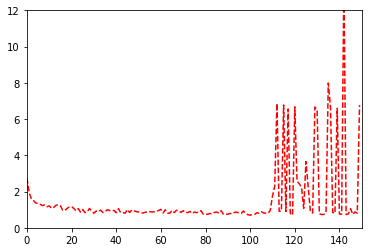

150

In [42]:
## Plot loss and accuracy 
episodes = list(range(0, 150))

loss = [2.750,1.9326,1.599,1.4933,1.3641,1.3544,1.2858,1.2228,1.2695,1.165,1.2079,
        1.0799,1.1265,1.242,1.2760,1.219,0.966,0.9580,1.0700,1.1492,1.1680,1.0672,
        0.9353,1.0579,0.8656,1.0098,0.837,0.8859,1.0678,0.9264,0.8049,0.9255,0.8928,
        0.9739,0.8459,0.8857,0.9969,0.9506,0.9345,0.960219,0.831869,1.0556, 0.8367,
        0.8366,0.8056,1.006,0.8444,0.983,0.9342,0.8919,0.8765,0.8173,0.8173,0.8597,
        0.877,0.8935,0.8714,0.8827,0.9247,0.9506,1.0173,0.8194,0.9933,0.8126,0.8047,
        0.9586,0.8423,0.969,0.9432,0.8538,0.9458,0.8530,0.8371,0.9035,0.7926,0.8675,
        0.8354,0.8754, 0.9470,0.7485,0.7522,0.7466,0.7914,0.7704,0.8512,0.8665,0.8145,
        0.9470,0.7485,0.7522,0.7466,0.7914,0.7704,0.8512,0.8665,0.8145,0.7918,0.9274,
        0.7951, 0.7180,0.6970,0.7397, 0.7380,0.8324,0.7980,0.8889, 0.8174, 0.8040,0.796,
        0.9588, 1.750, 2.289, 6.869,0.908,0.927,6.778,0.895,6.555,0.788,0.701,6.674,2.567,
        2.43,2.234,1.070,3.657,2.296,0.889,0.8122,6.668,6.516,0.774, 0.730,0.739,0.831,7.99,
        6.665,0.847,0.801,6.596,0.756,0.754,13.629,0.728,0.771,1.055,0.734,0.879,0.810,6.769]

plt.plot(episodes, loss, 'r--')
plt.axis([0, 150, 0, 12])
plt.show()
len(loss)


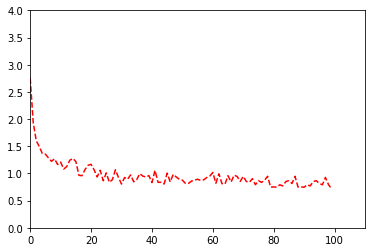

100

In [49]:
## Plot loss and accuracy por 100 episodes, Loss is decrasing and accuracy is growing during the first 100 episodes 
episodes = list(range(0, 100))

loss_Bolzman = [2.750,1.9326,1.599,1.4933,1.3641,1.3544,1.2858,1.2228,1.2695,1.165,1.2079,
        1.0799,1.1265,1.242,1.2760,1.219,0.966,0.9580,1.0700,1.1492,1.1680,1.0672,
        0.9353,1.0579,0.8656,1.0098,0.837,0.8859,1.0678,0.9264,0.8049,0.9255,0.8928,
        0.9739,0.8459,0.8857,0.9969,0.9506,0.9345,0.960219,0.831869,1.0556, 0.8367,
        0.8366,0.8056,1.006,0.8444,0.983,0.9342,0.8919,0.8765,0.8173,0.8173,0.8597,
        0.877,0.8935,0.8714,0.8827,0.9247,0.9506,1.0173,0.8194,0.9933,0.8126,0.8047,
        0.9586,0.8423,0.969,0.9432,0.8538,0.9458,0.8530,0.8371,0.9035,0.7926,0.8675,
        0.8354,0.8754, 0.9470,0.7485,0.7522,0.7466,0.7914,0.7704,0.8512,0.8665,0.8145,
        0.9470,0.7485,0.7522,0.7466,0.7914,0.7704,0.8512,0.8665,0.8145,0.7918,0.9274,
        0.7951, 0.7180]

plt.plot(episodes, loss_Bolzman, 'r--')
plt.axis([0, 110, 0, 4])
plt.show()
len(loss)

In [43]:
# Evaluate the algorithm for 10 episodes 
dqn.test(env, nb_episodes=10, visualize=True)


Testing for 10 episodes ...
Episode 1: reward: 210.000, steps: 488
Episode 2: reward: 210.000, steps: 502
Episode 3: reward: 210.000, steps: 490
Episode 4: reward: 210.000, steps: 499
Episode 5: reward: 210.000, steps: 499
Episode 6: reward: 210.000, steps: 507
Episode 7: reward: 210.000, steps: 502
Episode 8: reward: 210.000, steps: 508
Episode 9: reward: 210.000, steps: 498
Episode 10: reward: 210.000, steps: 490


In [25]:
## Save the model 
dqn.save_weights('dqn_{}_weights.h5f'.format(env), overwrite=True)


In [50]:
#SARSA Agent -- Reinforcement Learning 
from rl.agents.sarsa import SARSAAgent
sarsa = SARSAAgent(model, nb_actions, 
                policy=None, test_policy=None, 
                gamma=0.99, nb_steps_warmup=10, 
                train_interval=1)
sarsa.compile(Adam(lr=1e-3), metrics=['mae', 'acc'])
sarsa.fit(env, nb_steps=20000, visualize=True, verbose=2)
sarsa.test(env, nb_episodes=10, visualize=True)

Training for 20000 steps ...
   503/20000: episode: 1, duration: 6.395s, episode steps: 503, steps per second: 79, episode reward: 320.000, mean reward: 0.636 [0.000, 10.000], mean action: 5.746 [0.000, 8.000], mean observation: 72.752 [0.000, 228.000], loss: 3.257421, mean_absolute_error: 0.159048, acc: 0.916667, mean_q: 0.257621
   977/20000: episode: 2, duration: 3.642s, episode steps: 474, steps per second: 130, episode reward: 290.000, mean reward: 0.612 [0.000, 10.000], mean action: 5.719 [0.000, 8.000], mean observation: 72.752 [0.000, 228.000], loss: 3.080939, mean_absolute_error: 0.129520, acc: 0.909091, mean_q: 0.574435
  1484/20000: episode: 3, duration: 3.882s, episode steps: 507, steps per second: 131, episode reward: 210.000, mean reward: 0.414 [0.000, 10.000], mean action: 5.767 [0.000, 8.000], mean observation: 72.777 [0.000, 228.000], loss: 2.102091, mean_absolute_error: 0.095685, acc: 0.901186, mean_q: 0.747267
  1913/20000: episode: 4, duration: 3.272s, episode steps

 15735/20000: episode: 28, duration: 3.696s, episode steps: 489, steps per second: 132, episode reward: 310.000, mean reward: 0.634 [0.000, 10.000], mean action: 5.771 [0.000, 8.000], mean observation: 72.758 [0.000, 228.000], loss: 3.248598, mean_absolute_error: 0.097741, acc: 0.905738, mean_q: 0.999672
 16228/20000: episode: 29, duration: 3.708s, episode steps: 493, steps per second: 133, episode reward: 350.000, mean reward: 0.710 [0.000, 10.000], mean action: 5.805 [0.000, 8.000], mean observation: 72.750 [0.000, 228.000], loss: 3.624651, mean_absolute_error: 0.110654, acc: 0.898374, mean_q: 0.999747
 16851/20000: episode: 30, duration: 4.736s, episode steps: 623, steps per second: 132, episode reward: 460.000, mean reward: 0.738 [0.000, 10.000], mean action: 5.846 [0.000, 8.000], mean observation: 72.560 [0.000, 228.000], loss: 3.761692, mean_absolute_error: 0.106135, acc: 0.922830, mean_q: 0.999828
 17532/20000: episode: 31, duration: 5.188s, episode steps: 681, steps per second:

In [ ]:
loss_Bolzman = [3.257,3.080,2.102,1.]